# Sentiment Analysis - Shopee Code League 2020

## 1.0 Data Cleaning & Model Building 

### Introduction
Looking at the problem set and task for [Shopee Code League 2020 - Sentiment Analysis](https://www.kaggle.com/c/student-shopee-code-league-sentiment-analysis/overview), our team is looking for various approach to train our model tasked to review and analyse the sentiments of the buyers' reviews provided for this challenge. 

For our challenge; we are looking to clean, prepare the data and start building an initial model with NLTK & TF-IDF from the Scikit-Learn. 

As [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#:~:text=In%20information%20retrieval%2C%20tf%E2%80%93idf,in%20a%20collection%20or%20corpus.&text=tf%E2%80%93idf%20is%20one%20of,popular%20term%2Dweighting%20schemes%20today.) helps us to reflect the importance of the words from the corpus, we will be using the scheme vs. other available ones.

#### Problem Set
At Shopee, we always strive to ensure the customer’s highest satisfaction. Whatever product is sold on Shopee, we ensure the best user experience starting from product searching to product delivery, including product packaging, and product quality. Once a product is delivered, we always encourage our customer to rate the product and write their overall experience on the product landing page.

The rating and comments provided for a product by our buyers are most important to us. These product reviews help us to understand our customers needs and quickly adapt our services to provide a much better experience for our customers for the next order. The user's comments for a product ranges from aspects including delivery services, product packaging, product quality, product specifications, payment method, etc. Therefore it is important for us to build an accurate system to understand these reviews which has a great impact on overall Shopee’s user experience. This system is termed: "Shopee Product Review Sentiment Analyser".

We are provided with a training dataset, test dataset and submission sample dataset for the followin challenge.

#### Task
In this competition, a multiple product review sentiment classification model needs to be built. There are ~150k product reviews from different categories, including electronics, furniture, home & living products like air-conditioner and fashion products like T-shirts, rings, etc. For data security purposes, the review ids will be desensitized. The evaluation metrics is top-1 accuracy.

#### Team Introduction
Team Name: **JNNY** <br/>
Team Members: **Natalie, James, Yong Xian, Nicky** <br/>
Script Prepared by: **Nicky** [@ahjimomo](https://github.com/ahjimomo)

## 1.1 Library & Data Import

In [4]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import re
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [5]:
# Importing the training data

train_raw = pd.read_csv('input/train.csv')

In [6]:
# Reviewing the data imported

train_raw # imported 146,810 reviews, 3 columns

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5
146809,146809,Nice Packing boxes made effective price .........,5


In [7]:
# Reviewing some overview data for cleaning preparation

train_raw.head(20)

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
5,5,Dg yg depending being sent in photos,1
6,6,Hours not a hologram,1
7,7,"Shop fraudulent business. we put two lamps, on...",1
8,8,"Well, according to Price",1
9,9,"Pictures and names of elise 7154, but the bran...",1


## 1.2 Exploratory Analysis

Using the data imported, we can do some basic analyzing to see if any special cases might stand out

In [8]:
# Creating plot area

plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.4
4.8


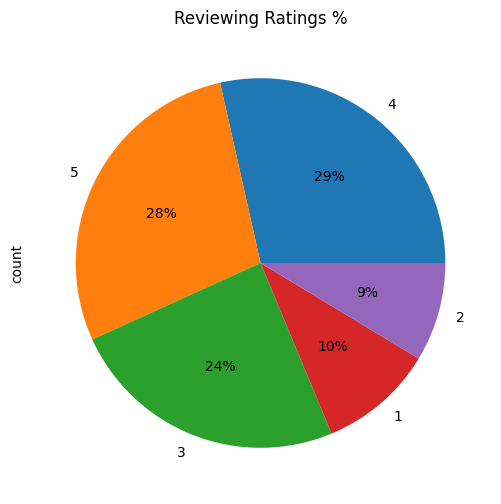

In [9]:
# Looking at the size of reviews & rating size

train_raw.rating.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title("Reviewing Ratings %")

plt.show()

From the pie chart / exploratory analysis, we can see that majority of the reviews are positive (falling into 4 - 5 rating) followed by neutral reviews and lastly 19% of negative reviews (1 - 2 rating) based off our training set.

This can be interesting if we try to analyze the common words of the various reviews - for now, we can move into cleaning of the data

## 1.3 Data Cleaning & Preparation

As we have seen earlier, the reviews are unfiltered and includes regular expressions; common stopwords, white spaces, single letters, etc.

We will need to clean, extract and prepare the labels (ratings) & features (sentiments/reviews) seperately for the training.

First we will be using some basic text pre-processing techniques with [Python Regular Expressions](https://developers.google.com/edu/python/regular-expressions) to clean the data <br/>
    - Removing regular expressions
    - Removing single characters
    - Removing words containing numbers
    - Removing multiple whitespaces
    - Making text all lowercase

After the cleaning process, we will then move to tokenizing the data for the TF-IDF approach

In [10]:
# Extract the labels & sentiments from the training data

features = train_raw.iloc[:, 1].values
labels = train_raw.iloc[:, 2].values

In [11]:
# Checking if we extracted from the correct column
i = 54321

while i < 54326:
    print(features[i])
    print("LABEL:", labels[i], "\n")
    i += 1

Respond quickly good seller Tuitui Tui!
LABEL: 3 

Large sya .. It never fit in my hand
LABEL: 3 

Semogaaaaaa cocokkkkkk yaaaaaaaa bagussssssssssssssss
LABEL: 3 

Prices steady delivery okehh I like sekalii. Sering2 yes flash sale
LABEL: 3 

 Product quality good price good product delivery speed well good seller Response
LABEL: 3 



In [12]:
processed_features = []

for sentence in range(0, len(features)):
    
    # Remove all special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # Remove all words that include digits / numbers
    processed_feature = re.sub(r'\w*\d\w*', ' ', processed_feature)
    
    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    # Substituing multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags = re.I)
    
    # Converting to lowercase
    processed_featured = processed_feature.lower()
    
    # Append cleaned review to processed list
    processed_features.append(processed_feature)

In [13]:
# Checking if labels / reviews have been cleaned up

i = 54321

while i < 54326:
    print(processed_features[i], "\n")
    i += 1

Respond quickly good seller Tuitui Tui  

Large sya It never fit in my hand 

Semogaaaaaa cocokkkkkk yaaaaaaaa bagussssssssssssssss 

Prices steady delivery okehh like sekalii yes flash sale 

 Product quality good price good product delivery speed well good seller Response 



#### Vectorization

Using Scikit-Learn library, we can utilize the `TfidfVectorizer` that would include the function of tokenization and filtering of stop words. <br/>

For our model, we will use `max_features` = 2500 with `max_df` of 80% to remove common words and a `min_df` of 8 to only include words that appear a minimal of 8 times across all reviews

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Preparing Training & Test Sets for model

For our training model, we will use 20% of the total data as the test data & 80% for the training data.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, labels, test_size = 0.2, random_state = 0)

## 1.4 Training  & Saving (pickle!) the Model

Now that our data is cleaned and split for training, we will move to training the model. <br/>

As our training and testing data set both has different languages & potentially other special characters that we missed out, we will use `RandomForestClassifier` for it's ability to act upon non-normalized data. <br/>

After the model is completed training, we will save the save the model through `pickle` to seralize & save our model so it can used later for the actual test as required.

More information can be found here on [pickle](https://docs.python.org/3/library/pickle.html#:~:text=%E2%80%9CPickling%E2%80%9D%20is%20the%20process%20whereby,back%20into%20an%20object%20hierarchy.)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Training the model

# model = RandomForestClassifier(n_estimators = 200, random_state = 0, verbose = 3)
model_2 = RandomForestClassifier(n_estimators = 300, random_state = 0, verbose = 3, n_jobs = -1, oob_score = True)
                                 
model_2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   41.3s


building tree 21 of 300
building tree 22 of 300building tree 23 of 300

building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.0min


building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 14.6min


building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.4min finished


RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=3)

In [19]:
# Saving (Pickle!) the model

filename = "rfc_model_02.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model_2, file)

## 1.5 Predicting & Evaluating the Model

Now that our model is trained & pickled! Time to test it out! ;)

In [20]:
# predictions = model.predict(x_test)
predictions = model_2.predict(x_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    7.4s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    8.1s finished


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1652  156  741  244  157]
 [ 529  515 1077  224  198]
 [ 498  155 4296 1163  963]
 [ 204   41 1312 3687 3155]
 [ 201   44 1348 3591 3212]]
              precision    recall  f1-score   support

           1       0.54      0.56      0.55      2950
           2       0.57      0.20      0.30      2543
           3       0.49      0.61      0.54      7075
           4       0.41      0.44      0.43      8399
           5       0.42      0.38      0.40      8396

    accuracy                           0.46     29363
   macro avg       0.48      0.44      0.44     29363
weighted avg       0.46      0.46      0.45     29363

0.4550624936144127


In [22]:
# Checking the prediction output accurate & is between 1 to 5

print(min(predictions))
print(max(predictions))

1
5


## Summary

Reviewing the accuracy score, it seems that our first model `rfc_model_01.pkl` has 45.5% accuracy, still not the best but we could try improving it by tuning the variables.

We then tuned and implemented a 2nd model where we increased the trees by increasing the `n_estimators` & turned on the `OOB_SCORE`. The resulted `rfc_model_02.pkl` has 45.36% accuracy which seems to be slightly poorer based on the current test_split testing.

Next, we will use both models to prepare a script for submission to see the actual test results before tuning accordingly.